In [53]:
from osgeo import gdal
import matplotlib.pyplot as plt

In [34]:
infile="C://Landsat8/LC08_L1TP_145045_20191014_20191018_01_T1_B3.tif"
outputREs="C://Landsat8/resample100b3.tif"
inDs = gdal.Open(infile)
outDs = gdal.Warp(outputREs, inDs,
                  format = 'GTiff',
                  xRes = 100, yRes = 100,
                  resampleAlg = gdal.GRA_Average,
                  )

# inDs = None
# outDs = None

In [3]:
data=outDs.ReadAsArray()

In [5]:
data.shape

(2307, 2259)

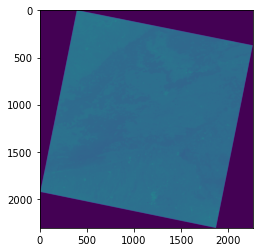

In [6]:
import matplotlib.pyplot as plt
plt.imshow(data)

In [31]:
import os
import sys
import ogr,osr

os.environ['PROJ_LIB'] = os.path.dirname(sys.argv[0])

In [33]:
### set projection to WGS84##
I=r"E://projec.tif"
outputPath=r"E://Proj_cut.tif"
targetSR = osr.SpatialReference()
targetSR.ImportFromEPSG(4326)
proj=gdal.Warp(outputPath,I,targetSR)

TypeError: Warp() takes 2 positional arguments but 3 were given

In [36]:
shp_clip=r"E:/india_shapefile/IND_adm/IND_adm1.shp"
inputPath=r"E://projec.tif"
outputPath=r"E://Proj_cut.tif"

In [38]:
options = gdal.WarpOptions(cutlineDSName=shp_clip,cropToCutline=True)
outBand = gdal.Warp(srcDSOrSrcDSTab=inputPath,
                        destNameOrDestDS=outputPath,
                        options=options)

In [61]:
from osgeo import gdal
def crop(inpath,shp_clip,Outpath):
    inDs = gdal.Open(inpath)
    proj=gdal.Warp(srcDSOrSrcDSTab=inDs,destNameOrDestDS=" ",dstSRS="EPSG:4326")
    outDs = gdal.Warp(" ", proj,
                  format = 'GTiff',
                  xRes = 0.5, yRes = 0.5,
                  resampleAlg = gdal.GRA_Average,
                  )
    
    options = gdal.WarpOptions(cutlineDSName=shp_clip,cropToCutline=True)
    outBand = gdal.Warp(srcDSOrSrcDSTab=outDs,
                        destNameOrDestDS=Outpath,
                        options=options)
    return outBand

    

In [62]:
shp_clip=r"E:/india_shapefile/IND_adm/IND_adm1.shp"
inputPath=r"E://projec.tif"
outputPath=r"E://Proj_cut3.tif"
data=crop(inputPath,shp_clip,outputPath)

TypeError: in method 'wrapper_GDALWarpDestName', argument 4 of type 'GDALWarpAppOptions *'

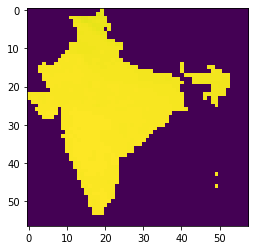

In [57]:
s=gdal.Open(r"E://Proj_cut3.tif")
d=s.ReadAsArray()
plt.imshow(d)

In [60]:
d.

<function ndarray.std>